# Leitura e tratamento de dados

In [ ]:
import pandas as pd
data = pd.read_csv(r"..\data\dataset_binario.csv")
unique_text1 = data['Text1'].unique()
unique_text2 = data['Text2'].unique()
pass

FileNotFoundError: [Errno 2] No such file or directory: '..\\data\\dataset_binario.csv'

convertedo de binario para linear e removendo duplicatas

In [ ]:
import pandas as pd

# Carregar o dataset (exemplo)
df = data


# Substituir 0 por 0.1
df["Label"] = df["Label"].replace(0, 0.1)

# Remover duplicados
df = df.drop_duplicates(subset=["Text1", "Text2"])

# Salvar o dataset
df.to_csv("base_de_dados_binarios_linear.csv", index=False)


verificando o numero de classes e seus nomes 

In [616]:
data = pd.read_csv(r'dataset_binario.csv')

unique_text1 = data['Text1'].unique()
unique_text2 = data['Text2'].unique()
print((unique_text2))  # Imprime as categorias unique_text2
print(len(unique_text2))


print(unique_text2.tostring())  # Imprime as categorias         unique_text2.tostring()

['dispositivos eletrônicos gadgets e smartphones' 'variedades'
 'joias e acessórios de luxo'
 'supermercado produtos alimentares e conveniência' 'peixaria'
 'produtos de saúde bem-estar e suplementos alimentares'
 'pães pizzas e produtos de panificação'
 'artigos de papelaria e material escolar' 'maternidade'
 'roupas e acessórios de moda' 'jogos consoles e acessórios gamers'
 'brinquedos e jogos infantis' 'adulto' 'esportes'
 'materiais e equipamentos de construção'
 'decoração e artigos para festas'
 'equipamentos e acessórios fotográficos' 'peças e acessórios automotivos'
 'bebidas alcoólicas' 'automóveis' 'produtos para casa'
 'ferramentas manuais e elétricas'
 'cafés bebidas lanches e sobremesas geladas'
 'produtos para pets e animais domésticos' 'doces bolos e confeitaria'
 'Colecionáveis' 'livros e material de leitura'
 'óculos e acessórios ópticos' 'instrumentos e acessórios musicais'
 'Viagens e Presentes' 'produtos de beleza e cuidados pessoais'
 'chocolates e doces']
32
b'\x

C:\Users\bruno\AppData\Local\Temp\ipykernel_16252\1134768870.py:9: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  print(unique_text2.tostring())  # Imprime as categorias         unique_text2.tostring()


substituição de nomes de classes 

In [ ]:
import pandas as pd

# Carregar os dados
data = pd.read_csv(r'dataset_binario.csv')

# Dicionário de substituições
substituicoes = {
    'antigo nome': 'novo',
    
    
}

# Aplicar as substituições na coluna Text2
data['Text2'] = data['Text2'].replace(substituicoes)

# Verificar os valores únicos após a substituição
print(data['Text2'].unique())

# Salvar a base de dados atualizada
data.to_csv(r'dataset_binario_novas_categorias.csv', index=False)


['alimentação e bebidas' 'cuidados e saúde' 'Viagens e Presentes'
 'lazer e entretenimento' 'casa e decoração' 'moda e acessórios'
 'carros motos peças e acessorios para veículos' 'adulto'
 'papelaria e escritório' 'tecnologia e eletrônicos'
 'produtos para pets e animais domésticos' 'Colecionáveis'
 'ferramentas manuais e elétricas'
 'materiais e equipamentos de construção']


padronizar dataset removendo espaços e deixando em lowercase

In [15]:
# Remover espaços extras e padronizar para minúsculas
data['Text1'] = data['Text1'].str.strip().str.lower()
data['Text2'] = data['Text2'].str.strip().str.lower()
data.to_csv('base_de_dados_corrigida.csv', index=False)

lematização do dataset

In [ ]:
import pandas as pd
import spacy
from nltk.corpus import stopwords
from unidecode import unidecode
import nltk


nltk.download('stopwords')
stop_words = set(stopwords.words('portuguese'))

# Carregar modelo de spaCy para lematização
nlp = spacy.load("pt_core_news_md")

# Função de pré-processamento
def preprocess_text(text):
    
    # Remover acentos
    text = unidecode(text)
    # Tokenizar e lematizar usando spaCy
    doc = nlp(text.lower())
    # Remover stopwords e manter apenas os lemas
    lemmatized = [token.lemma_ for token in doc if token.text not in stop_words and not token.is_punct]
    return " ".join(lemmatized)

# Carregar a base de dados



df = pd.read_csv(r'dataset_binario_novos_nomes.csv')

# Aplicar pré-processamento nas colunas Text1 e Text2
df['Text1'] = df['Text1'].str.strip().str.lower()
df['Text2'] = df['Text2'].str.strip().str.lower()
df["Text1"] = df["Text1"].apply(preprocess_text)
df["Text2"] = df["Text2"].apply(preprocess_text)

df.to_csv('base_de_dados_binarios_lema.csv', index=False)



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\bruno\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


embaralhando dataset

In [ ]:

data = pd.read_csv(r'dataset_binario_novos_nomes.csv')
df_embaralhado = data.sample(frac=1, random_state=42).reset_index(drop=True)
df_embaralhado.to_csv('dataset_binario_novos_nomes.csv', index=False)

# Analise

In [686]:
data.sort_values(by=['Label'], inplace=True)
data.head()

,Text1,Text2,Label
0,pitbull,alimentação e bebidas,0
6867,Procurando um cinto de couro masculino,carros motos peças e acessorios para veículos,0
6866,regador,alimentação e bebidas,0
6865,Ração para cães Pedigree,casa e decoração,0
6863,Câmera fotográfica,alimentação e bebidas,0


In [687]:
# Estatísticas descritivas da coluna 'Label'
print(data['Label'].describe())


count    12379.000000
mean         0.502464
std          0.500014
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: Label, dtype: float64


Distribuição por rotulo

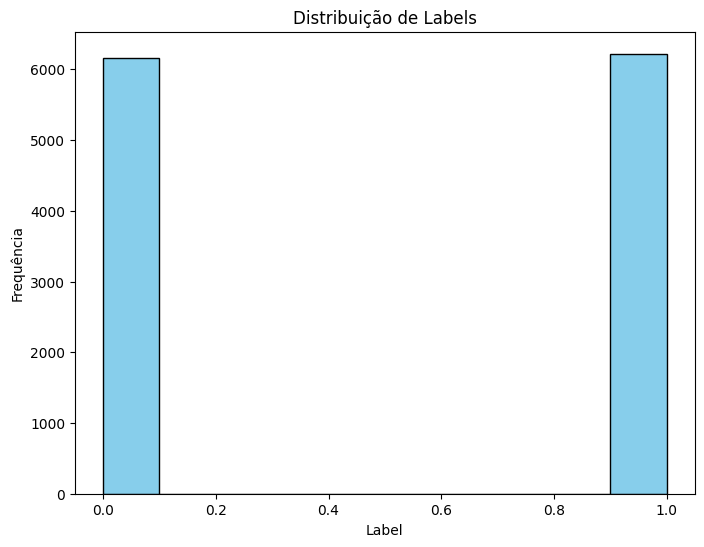

In [688]:
import matplotlib.pyplot as plt

# Histogram para a coluna 'Label'
plt.figure(figsize=(8, 6))
plt.hist(data['Label'], color='skyblue', edgecolor='black')
plt.title('Distribuição de Labels')
plt.xlabel('Label')
plt.ylabel('Frequência')

plt.show()


Distribuição por classe 

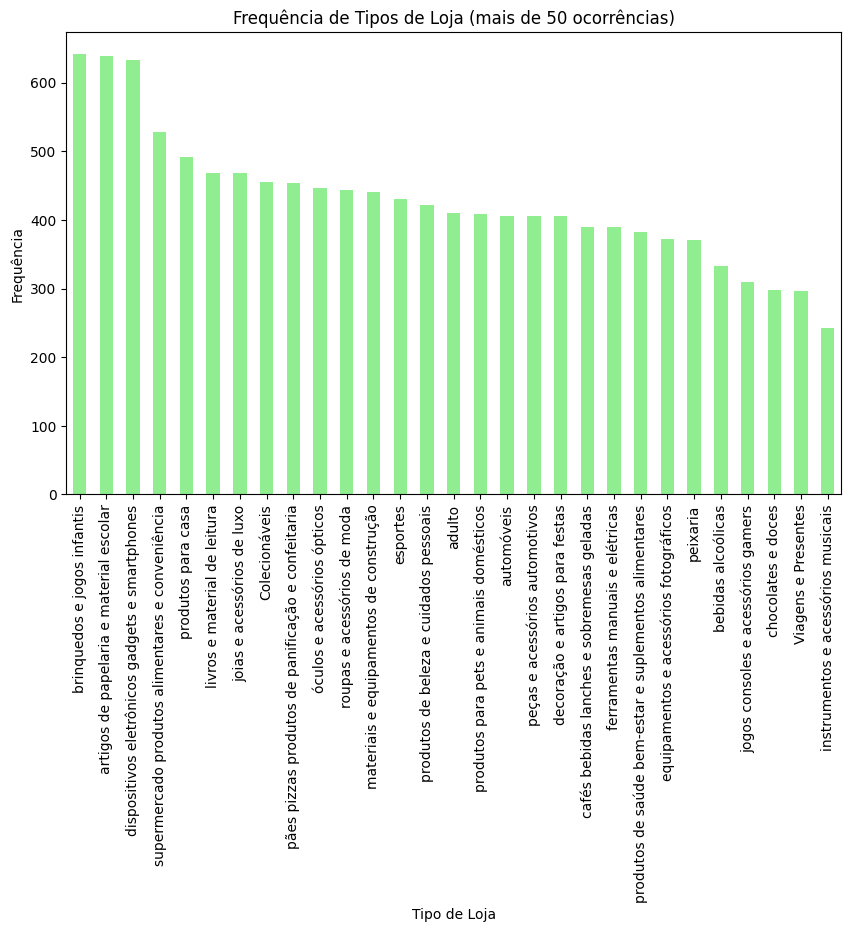

In [693]:

text2_counts = data['Text2'].value_counts()

lojas_mais_que_100 = text2_counts[text2_counts < 1000].index

data_filtered = data.loc[data['Text2'].isin(lojas_mais_que_100)]

plt.figure(figsize=(10, 6))
text2_counts_filtered = data_filtered['Text2'].value_counts()
text2_counts_filtered.plot(kind='bar', color='lightgreen')
plt.title('Frequência de Tipos de Loja (mais de 50 ocorrências)')
plt.xlabel('Tipo de Loja')
plt.ylabel('Frequência')
plt.xticks(rotation=90)
plt.show()


In [692]:
import pandas as pd

label_counts = data.groupby(['Text2', 'Label']).size().unstack(fill_value=0)

label_counts_filtered = label_counts[label_counts.sum(axis=1) < 1000]

label_counts_filtered

Label,0,1
Text2,,
Colecionáveis,211,244
Viagens e Presentes,113,183
adulto,213,197
artigos de papelaria e material escolar,363,276
automóveis,208,198
bebidas alcoólicas,165,168
brinquedos e jogos infantis,400,241
cafés bebidas lanches e sobremesas geladas,193,197
chocolates e doces,152,146
